In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#**Data 1(with constraints)**

##**1000 Data Points**

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for i in range(5):
  df_train1 = pd.DataFrame()
  df_train1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-1/w_1/train/{i}.csv")
  df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
  df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")*i
  df_train = pd.concat([df_train, df_train1], axis=0)

  df_test1 = pd.DataFrame()
  df_test1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-1/w_1/test/{i}.csv")
  df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
  df_test1["target"] = np.ones(df_test1.shape[0])*i
  df_test = pd.concat([df_test, df_test1], axis=0)

  df_valid = pd.DataFrame()
  df_valid = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-1/w_1/validation/{i}.csv")
  df_valid = df_valid.drop(df_valid.columns[0], axis=1)  
  df_valid["target"] = np.ones(df_valid.shape[0])*i
  df_test = pd.concat([df_test, df_valid], axis=0)

X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
C = [0, 0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf']

model_params = {
    'Support Vector Machine':{
        'model': SVC(),
        'params':{
            'C': C,
            'kernel': kernel
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='accuracy', 
                                    n_iter = 21,
                                    cv=3,
                                    verbose=0)
    
    best_model.fit(X_train, Y_train)
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

best_params = pd.DataFrame(scores)
best_params.head()

,model,Best Score,Best Parameter
0,Support Vector Machine,0.493333,"{'kernel': 'rbf', 'C': 10}"


In [ ]:
svm = SVC(kernel = 'rbf', C = 10)
svm.fit(X_train, Y_train)

Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       120
           1       0.60      0.62      0.61       120
           2       0.91      0.88      0.89       120
           3       0.72      0.71      0.71       120
           4       0.79      0.79      0.79       120

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.45      0.50      0.48        30
           1       0.43      0.40      0.41        30
           2       0.80      0.80      0.80        30
           3       0.62      0.53      0.57        30
           4       0.52      0.57      0.54        30

    accuracy                           0.56       150
   macro avg       0.56      0.56      0.56       150
weighted avg    

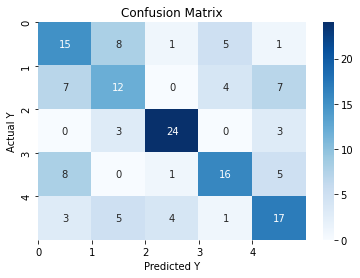

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_test);

sns.heatmap(cm, annot=True, fmt='.3g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));

plt.show()

##**2000 Data points**

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for i in range(5):
  df_train1 = pd.DataFrame()
  df_train1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-1/w_0.5/train/{i}.csv")
  df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
  df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")*i
  df_train = pd.concat([df_train, df_train1], axis=0)

  df_test1 = pd.DataFrame()
  df_test1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-1/w_0.5/test/{i}.csv")
  df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
  df_test1["target"] = np.ones(df_test1.shape[0])*i
  df_test = pd.concat([df_test, df_test1], axis=0)

  df_valid = pd.DataFrame()
  df_valid = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-1/w_0.5/validation/{i}.csv")
  df_valid = df_valid.drop(df_valid.columns[0], axis=1)  
  df_valid["target"] = np.ones(df_valid.shape[0])*i
  df_test = pd.concat([df_test, df_valid], axis=0)

X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
C = [0, 0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf']

model_params = {
    'Support Vector Machine':{
        'model': SVC(),
        'params':{
            'C': C,
            'kernel': kernel
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='accuracy', 
                                    n_iter = 21,
                                    cv=3,
                                    verbose=0)
    
    best_model.fit(X_train, Y_train)
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

best_params = pd.DataFrame(scores)
best_params.head()

,model,Best Score,Best Parameter
0,Support Vector Machine,0.515,"{'kernel': 'linear', 'C': 0.1}"


In [ ]:
svm = SVC(kernel = 'linear', C = 0.1)
svm.fit(X_train, Y_train)

Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.53      0.62      0.57       120
           1       0.39      0.35      0.37       120
           2       0.85      0.91      0.88       120
           3       0.60      0.57      0.59       120
           4       0.75      0.68      0.71       120

    accuracy                           0.63       600
   macro avg       0.62      0.63      0.62       600
weighted avg       0.62      0.63      0.62       600



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.34      0.40      0.37        30
           1       0.13      0.10      0.11        30
           2       0.89      0.83      0.86        30
           3       0.56      0.60      0.58        30
           4       0.62      0.67      0.65        30

    accuracy                           0.52       150
   macro avg       0.51      0.52      0.51       150
weighted avg    

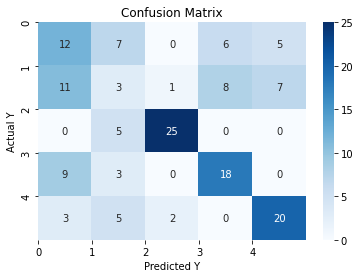

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_test);

sns.heatmap(cm, annot=True, fmt='.3g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));

plt.show()

#**Data 2(without constraints)**

##**1000 Data points**

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for i in range(5):
  df_train1 = pd.DataFrame()
  df_train1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-2/w_1/train/{i}.csv")
  df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
  df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")*i
  df_train = pd.concat([df_train, df_train1], axis=0)

  df_test1 = pd.DataFrame()
  df_test1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-2/w_1/test/{i}.csv")
  df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
  df_test1["target"] = np.ones(df_test1.shape[0])*i
  df_test = pd.concat([df_test, df_test1], axis=0)

  df_valid = pd.DataFrame()
  df_valid = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-2/w_1/validation/{i}.csv")
  df_valid = df_valid.drop(df_valid.columns[0], axis=1)  
  df_valid["target"] = np.ones(df_valid.shape[0])*i
  df_test = pd.concat([df_test, df_valid], axis=0)

X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
C = [0, 0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf']

model_params = {
    'Support Vector Machine':{
        'model': SVC(),
        'params':{
            'C': C,
            'kernel': kernel
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='accuracy', 
                                    n_iter = 21,
                                    cv=3,
                                    verbose=0)
    
    best_model.fit(X_train, Y_train)
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

best_params = pd.DataFrame(scores)
best_params.head()

,model,Best Score,Best Parameter
0,Support Vector Machine,0.485,"{'kernel': 'linear', 'C': 0.01}"


In [ ]:
svm = SVC(kernel = 'linear', C = 0.01)
svm.fit(X_train, Y_train)

Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.55      0.47      0.50       120
           1       0.43      0.40      0.42       120
           2       0.76      0.76      0.76       120
           3       0.52      0.61      0.56       120
           4       0.58      0.62      0.60       120

    accuracy                           0.57       600
   macro avg       0.57      0.57      0.57       600
weighted avg       0.57      0.57      0.57       600



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.48      0.33      0.39        30
           1       0.41      0.47      0.44        30
           2       0.84      0.87      0.85        30
           3       0.51      0.63      0.57        30
           4       0.70      0.63      0.67        30

    accuracy                           0.59       150
   macro avg       0.59      0.59      0.58       150
weighted avg    

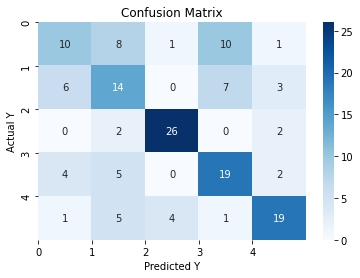

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_test);

sns.heatmap(cm, annot=True, fmt='.3g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));

plt.show()

##**2000 Data points**

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for i in range(5):
  df_train1 = pd.DataFrame()
  df_train1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-2/w_0.5/train/{i}.csv")
  df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
  df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")*i
  df_train = pd.concat([df_train, df_train1], axis=0)

  df_test1 = pd.DataFrame()
  df_test1 = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-2/w_0.5/test/{i}.csv")
  df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
  df_test1["target"] = np.ones(df_test1.shape[0])*i
  df_test = pd.concat([df_test, df_test1], axis=0)

  df_valid = pd.DataFrame()
  df_valid = pd.read_csv(f"/content/drive/MyDrive/BTP/Data/1D/data-2/w_0.5/validation/{i}.csv")
  df_valid = df_valid.drop(df_valid.columns[0], axis=1)  
  df_valid["target"] = np.ones(df_valid.shape[0])*i
  df_test = pd.concat([df_test, df_valid], axis=0)

X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
C = [0, 0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf']

model_params = {
    'Support Vector Machine':{
        'model': SVC(),
        'params':{
            'C': C,
            'kernel': kernel
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='accuracy', 
                                    n_iter = 21,
                                    cv=3,
                                    verbose=0)
    
    best_model.fit(X_train, Y_train)
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

best_params = pd.DataFrame(scores)
best_params.head()

,model,Best Score,Best Parameter
0,Support Vector Machine,0.481667,"{'kernel': 'linear', 'C': 0.1}"


In [ ]:
svm = SVC(kernel = 'linear', C = 0.1)
svm.fit(X_train, Y_train)

Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.52      0.59      0.55       120
           1       0.39      0.31      0.34       120
           2       0.87      0.86      0.87       120
           3       0.55      0.50      0.52       120
           4       0.55      0.64      0.59       120

    accuracy                           0.58       600
   macro avg       0.58      0.58      0.58       600
weighted avg       0.58      0.58      0.58       600



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.52      0.47      0.49        30
           1       0.38      0.27      0.31        30
           2       0.72      0.70      0.71        30
           3       0.74      0.67      0.70        30
           4       0.46      0.70      0.55        30

    accuracy                           0.56       150
   macro avg       0.56      0.56      0.55       150
weighted avg    

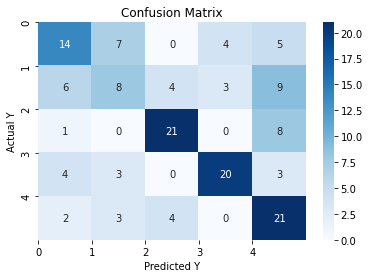

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_test);

sns.heatmap(cm, annot=True, fmt='.3g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(5));
plt.yticks(np.arange(5));

plt.show()